<a href="https://colab.research.google.com/github/lalafadli/UAS_AI_2023/blob/main/UAS_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def load_data():
 data = pd.read_csv('datd_test.csv')
 return data

In [3]:
tweet_df = load_data()

In [4]:
#tampilkan 5 data hasil pengambilan data dar exel
tweet_df.head()

,text,label
0,"ngga enak bgt akhir2 ini rasanya, sering cemas...",1
1,Sedikit khawatir dan gelisah. 😓,1
2,Ngelakuin kesalahan yang sama. Bodoh bgt. Udah...,1
3,"Pantesan gelisah bae, lupa lgi ga ada duit🤭",0
4,Semoga Mei disertai kabar-kabar baik. Yang luk...,0


In [5]:
#mengubah urutan kolom dan dimaasukkan ke data frame agar mudah ke bagian preprosseing
df = pd.DataFrame(tweet_df[['label','text']])

In [6]:
#hitung total data
df.shape

(550, 2)

In [7]:
#menghitung banyaknya data sesuai jenis label nya
df['label'].value_counts()

0    389
1    161
Name: label, dtype: int64

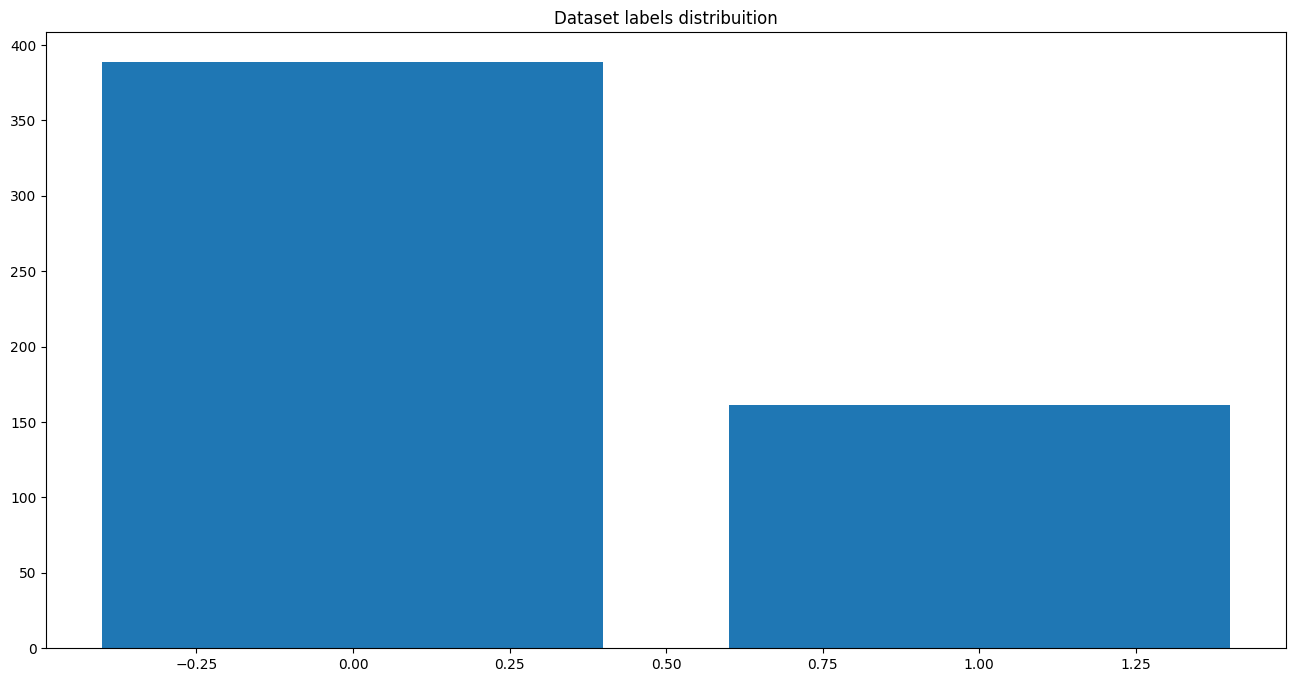

In [8]:
#memunculkan data grafik berdasarkan label untuk menunjukkan keseimbangan data
import matplotlib.pyplot as plt

from collections import Counter

label_cnt = Counter(df.label)

plt.figure(figsize=(16,8))

plt.bar(label_cnt.keys(), label_cnt.values())

plt.title("Dataset labels distribuition")

#mengubah huruf menjadi kecil semua
df['lower'] = df['text'].str.lower()

In [9]:
import re # impor modul regular expression

def hapus_angka(tweet):
  tweet = re.sub(r"\d+", "", tweet)
  return tweet


In [10]:
df['h_angka']= df['lower'].apply(lambda x: hapus_angka(x))

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#import stopword

from nltk.corpus import stopwords

stopwords_indonesia = stopwords.words('indonesian')

In [13]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [14]:
#import sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()

stemmer = factory.create_stemmer()

In [15]:
#tokenize
from nltk.tokenize import TweetTokenizer

In [16]:
#persiapkan untuk emoticon yang di hapus
# all

emoticons_phone = set(['🤣','😁','😂','🖖','😘','❤️','😄','😔','☺️','👍','😊','😍','😭','💋','😒','😳','😜','🙈','😡',

'😱','😝','😢','😃','😉','😏','😞','😅','😚','🙊','😌','😀','😋','😆','😕','👌','😀','😃',

'😄','😁','😆','😅','😂','🤣','☺️','😊','😇','🙂','🙃','😉','😌','😍','🥰','😘','😗','😙','😚',

'😋','😛','😝','😜','🤪','🤨','🧐','🤓','😎','🤩','🥳','😏','😒','😞','😔','😟','😕','🙁',

'☹️','😣','😖','😫','😩','🥺','😢','😭','😤','😠','😡','🤬','🤯','😳','🥵','🥶','😱','😨',

'😰','😥','😓','🤗','🤔','🤭🤫','🤥😶','😐','😑','😬','🙄','😯','😦','😧','😮','😲','🥱','😴',

'🤤','😪','😵','🤐','🥴','🤢','🤮','🤧','😷','🤒','🤕','🤑','🤠😈','👿','👹','👺','🤡','💩',

'👻','💀','☠️','👽','👾','🤖','🎃','😺','😸','😻','😹','😼','😽','🙀','😿','😾','🤲','👍','🤝',

'👎','🤜','🤛','🤞','✌️','🤟','🤘','👌','🤏','👈','👉','👆','👇','☝️','✋','🤚','🖐','🖖','👋','🤙',

'💪','🦾','👇','🖕','🙏','🦶','🦵','🦿','💄','💋','👄','🦷','👅','👃','🦻','👣','👁','👀','🧠',

'🗣👤','👥','👶','👧','🧒','👦','👩','🧑','👨','👩‍🦱','🧑‍🦱','👨‍🦱👩‍🦰','🧑‍🦰👨‍🦰','👱‍♀️','👱','👱‍♂️','👩‍🦳','🧑‍🦳',

'👨‍🦳','👩‍🦲','🧑‍🦲','👨‍🦲','🧔','👵','🧓','👴','👲','👳‍♀️','👳','👳‍♂️','🧕','👮‍♀️','👲','👮‍♂️','👷‍♀️','👷','👷‍♂️',

'💂‍♀️','💂','💂‍♂️','🕵️‍♀️','🕵️','🕵️‍♂️','👩‍⚕️','🧑‍⚕️','👨‍⚕️','👩‍🌾','🐒','🙊','🐵','🙈','🙉','🐷','🐻','🐶','🐱',

'🦊','🚗','🚕','🚙','🚌','🚎','🏎','🚛','🚚','🚐','🚒','🚑','🚓','🏢','🏠','🏡','🏬','🏘','🏣',

'🏚','🏤','🏗','🏥','⛺️','🏦','🏛','💒','🏩','🏫','🏪','🏨','⛪️','🕌','🕍','🛕','🕋','⛩','📈',

'📉','🗒','🗓'])

In [17]:
# sad happy

emoticons_sad_happy= set(['◉‿◉','o ^ - ^ o','^_^',':)',':^)',

': NS)','8)',':HAI','@',':HAI)',':‑)',

':P',':@','8‑D',':‑)',':-&','=D',':‑p',

'=‑D','XD',':D',':-))','%-)',':}',

':c)',':^)',':C','>:3',':>','L',':-/','>:/',

':S','>:[','@',':-(','"["',':-<',

'=\\','=/','>:(',':',':{','>:\\',

'(',':','(", ")',':','("',':-c',

'> :(',':‑',':NS('])

# all emot happy + sad

emoticons = emoticons_phone.union(emoticons_sad_happy)

In [18]:
def fulltext(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    #remove coma
    tweet = re.sub(r',','',tweet)
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False,
    strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
            word not in emoticons and # remove emoticons
            word not in string.punctuation): # remove punctuation
    #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
            return tweets_clean

In [19]:
df['token'] = df['h_angka'].apply(lambda x: fulltext(x))

In [20]:
df.head()

,label,text,lower,h_angka,token
0,1,"ngga enak bgt akhir2 ini rasanya, sering cemas...","ngga enak bgt akhir2 ini rasanya, sering cemas...","ngga enak bgt akhir ini rasanya, sering cemas ...",[ngga]
1,1,Sedikit khawatir dan gelisah. 😓,sedikit khawatir dan gelisah. 😓,sedikit khawatir dan gelisah. 😓,[khawatir]
2,1,Ngelakuin kesalahan yang sama. Bodoh bgt. Udah...,ngelakuin kesalahan yang sama. bodoh bgt. udah...,ngelakuin kesalahan yang sama. bodoh bgt. udah...,[ngelakuin]
3,0,"Pantesan gelisah bae, lupa lgi ga ada duit🤭","pantesan gelisah bae, lupa lgi ga ada duit🤭","pantesan gelisah bae, lupa lgi ga ada duit🤭",[pantesan]
4,0,Semoga Mei disertai kabar-kabar baik. Yang luk...,semoga mei disertai kabar-kabar baik. yang luk...,semoga mei disertai kabar-kabar baik. yang luk...,[moga]


In [21]:
#remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

In [22]:
#simpan di kolom tabel baru tweet
df['fulltext'] = df['text'].apply(lambda x: remove_punct(x))

In [23]:
df.head()

,label,text,lower,h_angka,token,fulltext
0,1,"ngga enak bgt akhir2 ini rasanya, sering cemas...","ngga enak bgt akhir2 ini rasanya, sering cemas...","ngga enak bgt akhir ini rasanya, sering cemas ...",[ngga],n g g a e n a k b g t a k h i r 2 i n ...
1,1,Sedikit khawatir dan gelisah. 😓,sedikit khawatir dan gelisah. 😓,sedikit khawatir dan gelisah. 😓,[khawatir],S e d i k i t k h a w a t i r d a n g e ...
2,1,Ngelakuin kesalahan yang sama. Bodoh bgt. Udah...,ngelakuin kesalahan yang sama. bodoh bgt. udah...,ngelakuin kesalahan yang sama. bodoh bgt. udah...,[ngelakuin],N g e l a k u i n k e s a l a h a n y a n ...
3,0,"Pantesan gelisah bae, lupa lgi ga ada duit🤭","pantesan gelisah bae, lupa lgi ga ada duit🤭","pantesan gelisah bae, lupa lgi ga ada duit🤭",[pantesan],P a n t e s a n g e l i s a h b a e l u ...
4,0,Semoga Mei disertai kabar-kabar baik. Yang luk...,semoga mei disertai kabar-kabar baik. yang luk...,semoga mei disertai kabar-kabar baik. yang luk...,[moga],S e m o g a M e i d i s e r t a i k a b ...


In [24]:
#Mengurutkan ascending urutkan kolom tweet
df.sort_values("fulltext", inplace = True)

In [25]:
df.head()

,label,text,lower,h_angka,token,fulltext
72,0,#. Tbh tadi udah harap2 cemas tadi teaser shoo...,#. tbh tadi udah harap2 cemas tadi teaser shoo...,#. tbh tadi udah harap cemas tadi teaser shoot...,[tbh],T b h t a d i u d a h h a r a p 2 c ...
436,1,#. hari ini rasanya gelisah trs,#. hari ini rasanya gelisah trs,#. hari ini rasanya gelisah trs,[gelisah],h a r i i n i r a s a n y a g e l i s ...
162,1,2020-2021 adalah tahun sulit dimana aku kehila...,2020-2021 adalah tahun sulit dimana aku kehila...,- adalah tahun sulit dimana aku kehilangan pek...,[sulit],2 0 2 0 2 0 2 1 a d a l a h t a h u n s ...
361,0,3 hari terakhir gelisah karena memutuskan ga p...,3 hari terakhir gelisah karena memutuskan ga p...,hari terakhir gelisah karena memutuskan ga pu...,[gelisah],3 h a r i t e r a k h i r g e l i s a h ...
51,1,3g gelisah galau gila,3g gelisah galau gila,g gelisah galau gila,[g],3 g g e l i s a h g a l a u g i l a


In [26]:
import string
df['label'].value_counts()

0    389
1    161
Name: label, dtype: int64

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['text'])
bow_transformer.vocabulary_

{'tbh': 2515,
 'tadi': 2478,
 'udah': 2700,
 'harap2': 936,
 'cemas': 478,
 'teaser': 2523,
 'shooting': 2375,
 'mv': 1787,
 'xixi': 2783,
 'halu': 928,
 'hari': 940,
 'ini': 1037,
 'rasanya': 2151,
 'gelisah': 852,
 'trs': 2663,
 '2020': 7,
 '2021': 8,
 'adalah': 35,
 'tahun': 2484,
 'sulit': 2461,
 'dimana': 656,
 'aku': 75,
 'kehilangan': 1230,
 'pekerjaanku': 2005,
 'nganggur': 1819,
 'selama': 2302,
 'merasa': 1707,
 'depresi': 589,
 'akan': 67,
 'masa': 1543,
 'depan': 587,
 'putus': 2135,
 'asa': 158,
 'stress': 2448,
 'tapi': 2507,
 'sesulit': 2361,
 'apapun': 147,
 'keadaannya': 1207,
 'berterimakasih': 369,
 'kepada': 1271,
 'tuhan': 2676,
 'karna': 1175,
 'memberi': 1597,
 'kekuatan': 1239,
 'untuk': 2713,
 'menghadapi': 1658,
 'ku': 1372,
 'terakhir': 2554,
 'karena': 1173,
 'memutuskan': 1614,
 'ga': 813,
 'pulang': 2124,
 'padahal': 1949,
 'tadinya': 2479,
 'bulet': 446,
 'akhirnya': 73,
 'pas': 1986,
 'sholat': 2374,
 'tarawih': 2508,
 'bener2': 290,
 'nanya': 1803,
 'ke

In [28]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['03' '05' '10' ... 'yyapi' 'zona' 'zoom']


In [29]:
text_bow = bow_transformer.transform(df['text'])
print(text_bow)

  (0, 478)	1
  (0, 928)	1
  (0, 936)	1
  (0, 1787)	1
  (0, 2375)	1
  (0, 2478)	2
  (0, 2515)	1
  (0, 2523)	1
  (0, 2700)	1
  (0, 2783)	1
  (1, 852)	1
  (1, 940)	1
  (1, 1037)	1
  (1, 2151)	1
  (1, 2663)	1
  (2, 7)	1
  (2, 8)	1
  (2, 35)	1
  (2, 67)	1
  (2, 75)	2
  (2, 147)	1
  (2, 158)	1
  (2, 369)	1
  (2, 478)	1
  (2, 587)	1
  :	:
  (549, 575)	1
  (549, 604)	2
  (549, 668)	1
  (549, 766)	1
  (549, 787)	2
  (549, 813)	2
  (549, 875)	1
  (549, 1155)	1
  (549, 1158)	1
  (549, 1162)	2
  (549, 1205)	1
  (549, 1477)	1
  (549, 1926)	1
  (549, 1949)	1
  (549, 2061)	1
  (549, 2130)	1
  (549, 2206)	1
  (549, 2366)	1
  (549, 2388)	1
  (549, 2430)	1
  (549, 2458)	1
  (549, 2507)	1
  (549, 2533)	1
  (549, 2583)	1
  (549, 2785)	1


In [30]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(550, 2817)

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 2783)	0.33038638203874593
  (0, 2700)	0.1904483551102775
  (0, 2523)	0.29578588990108395
  (0, 2515)	0.33038638203874593
  (0, 2478)	0.5000930544947587
  (0, 2375)	0.33038638203874593
  (0, 1787)	0.33038638203874593
  (0, 936)	0.2678510122681272
  (0, 928)	0.33038638203874593
  (0, 478)	0.09288216330918739
  (1, 2663)	0.598977593228074
  (1, 2151)	0.5114687871552306
  (1, 1037)	0.3656373571880638
  (1, 940)	0.46194659103006613
  (1, 852)	0.1803890036584564
  (2, 2713)	0.1119119483598754
  (2, 2676)	0.12498348231162672
  (2, 2507)	0.10160937278621866
  (2, 2484)	0.33914908000524735
  (2, 2461)	0.32637721421720456
  (2, 2448)	0.15355942844262876
  (2, 2361)	0.1778074394015546
  (2, 2302)	0.15355942844262876
  (2, 2135)	0.1778074394015546
  (2, 2005)	0.18941105938517627
  :	:
  (549, 2061)	0.11150176374326641
  (549, 1949)	0.11660276197262968
  (549, 1926)	0.09185907233053055
  (549, 1477)	0.139697394037089
  (549, 1205)	0.11523327842283265
  (549, 1162)	0.2144415

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, df.label,test_size=0.2, random_state=35)

In [33]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)

In [34]:
prediction = model.predict(x_test)
predict= pd.Series(prediction)
print(predict.to_string())

0      1
1      1
2      1
3      0
4      0
5      0
6      1
7      0
8      0
9      1
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     1
26     0
27     0
28     0
29     0
30     1
31     0
32     1
33     1
34     1
35     0
36     1
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     1
46     1
47     1
48     0
49     0
50     0
51     1
52     0
53     0
54     0
55     1
56     0
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     0
66     1
67     0
68     1
69     1
70     0
71     0
72     0
73     1
74     1
75     0
76     0
77     1
78     0
79     1
80     0
81     0
82     0
83     0
84     0
85     1
86     1
87     1
88     1
89     1
90     0
91     0
92     0
93     0
94     0
95     0
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    1
106    0
107    0
108    0
109    0


In [35]:
true_label= pd.Series(y_test)
print(true_label.to_string())

156    0
504    0
342    1
25     0
367    0
396    0
509    1
353    1
30     1
209    0
8      0
519    1
393    0
199    0
269    0
134    0
133    1
548    0
230    0
181    0
405    1
525    1
310    0
180    0
331    0
196    1
164    1
426    1
338    0
539    0
35     1
136    0
226    0
125    1
20     0
234    0
270    1
19     0
413    0
536    0
284    0
349    0
387    0
139    0
541    0
68     1
174    1
3      0
10     0
390    0
268    0
382    0
38     0
185    0
475    0
451    1
47     1
373    1
242    0
260    0
110    1
348    0
256    0
198    0
456    1
118    0
346    0
530    1
11     0
41     0
151    0
480    0
511    0
463    1
461    0
477    0
135    0
208    0
414    0
158    1
527    0
237    0
4      0
423    0
82     0
272    0
418    1
64     0
287    0
450    1
33     0
175    1
43     0
207    0
303    0
357    0
537    0
205    1
389    0
211    1
154    0
323    1
453    1
87     0
478    1
248    0
378    0
84     0
280    0
307    0


test time:  0.025s
accuracy:   0.655
              precision    recall  f1-score   support

     negatif       0.79      0.71      0.74        78
     positif       0.42      0.53      0.47        32

    accuracy                           0.65       110
   macro avg       0.61      0.62      0.61       110
weighted avg       0.68      0.65      0.66       110



Text(0.5, 23.52222222222222, 'Label prediksi')

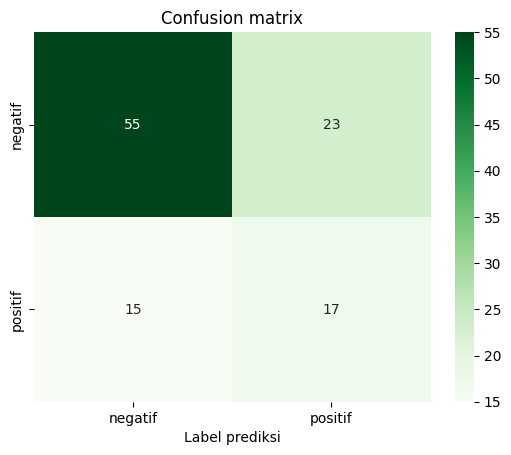

In [48]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import DataFrame


t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif','positif']))

columns = ['negatif','positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train,y_train, cv=10)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 10 folds
print(scores.mean())

[0.63636364 0.77272727 0.72727273 0.56818182 0.65909091 0.70454545
 0.5        0.52272727 0.72727273 0.63636364]
0.6454545454545456


In [42]:
user_data = ["bingung ga enak bgt akhir-akhir ini tiap mau tidur bawaannya gelisah terus",
             "gelisah ga tau kenapa.ga tenang aja rasanya",
             "perasaan sensitif bikin hati gelisah."]
print(user_data)

['bingung ga enak bgt akhir-akhir ini tiap mau tidur bawaannya gelisah terus', 'gelisah ga tau kenapa.ga tenang aja rasanya', 'perasaan sensitif bikin hati gelisah.']


In [43]:
test_1_unseen =  bow_transformer.transform(user_data)
data=test_1_unseen.toarray()
print("diubah menjadi array: \n ",data)

diubah menjadi array: 
  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
print("ukuran dari array: \n ",data.shape)

ukuran dari array: 
  (3, 2817)


In [45]:
prediction_unseen = model.predict(data)
print(prediction_unseen)

[1 1 0]
